<a href="https://colab.research.google.com/github/gkarthick510/practice-works/blob/main/Task_6.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>







# **Assignment 8**

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
df=pd.read_csv("car_data.csv")
df.head()

,Price,Mileage,Make,Model,Trim,Type,Cylinder,Liter,Doors,Cruise,Sound,Leather
0,17314.103129,8221,Buick,Century,Sedan 4D,Sedan,6,3.1,4,1,1,1
1,17542.036083,9135,Buick,Century,Sedan 4D,Sedan,6,3.1,4,1,1,0
2,16218.847862,13196,Buick,Century,Sedan 4D,Sedan,6,3.1,4,1,1,0
3,16336.913140,16342,Buick,Century,Sedan 4D,Sedan,6,3.1,4,1,0,0
4,16339.170324,19832,Buick,Century,Sedan 4D,Sedan,6,3.1,4,1,0,1


In [ ]:
df.describe()

,Price,Mileage,Cylinder,Liter,Doors,Cruise,Sound,Leather
count,804.000000,804.000000,804.000000,804.000000,804.000000,804.000000,804.000000,804.000000
mean,21343.143767,19831.934080,5.268657,3.037313,3.527363,0.752488,0.679104,0.723881
std,9884.852801,8196.319707,1.387531,1.105562,0.850169,0.431836,0.467111,0.447355
min,8638.930895,266.000000,4.000000,1.600000,2.000000,0.000000,0.000000,0.000000
25%,14273.073870,14623.500000,4.000000,2.200000,4.000000,1.000000,0.000000,0.000000
50%,18024.995019,20913.500000,6.000000,2.800000,4.000000,1.000000,1.000000,1.000000
75%,26717.316636,25213.000000,6.000000,3.800000,4.000000,1.000000,1.000000,1.000000
max,70755.466717,50387.000000,8.000000,6.000000,4.000000,1.000000,1.000000,1.000000


In [ ]:
x=df[["Mileage"]].values
y=df[["Price"]].values


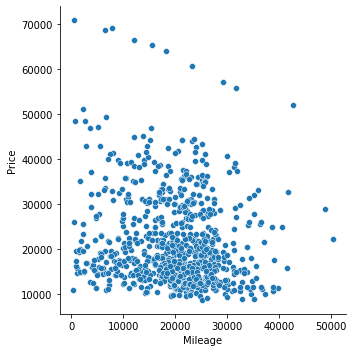

In [ ]:
sns.relplot(x="Mileage",y="Price",data=df)

In [ ]:
df[["Mileage","Price"]].corr()

,Mileage,Price
Mileage,1.000000,-0.143051
Price,-0.143051,1.000000


In [ ]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=4)
from sklearn.linear_model import LinearRegression
Regress=LinearRegression()
Regress.fit(x_train,y_train)
y_pred=Regress.predict(x_test)

In [ ]:
from sklearn import metrics
metrics.r2_score(y_test,y_pred)

0.020815016185416924

**This is not the strong correlation**

# PART-**2**

In [ ]:
x=df[["Mileage","Cylinder","Liter","Doors","Cruise","Sound","Leather"]].values
y=df["Price"].values

In [ ]:
df[["Mileage","Cylinder","Liter","Doors","Cruise","Sound","Leather","Price"]].corr()

In [ ]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=4)
from sklearn.preprocessing import StandardScaler
Scaler=StandardScaler()
Scaler.fit(x_train)
train_trans=Scaler.transform(x_train)
test_trans=Scaler.transform(x_test)
from sklearn.linear_model import LinearRegression
Regress=LinearRegression()
Regress.fit(train_trans,y_train)
y_pred=Regress.predict(test_trans)

In [ ]:
from sklearn import metrics
metrics.r2_score(y_pred,y_test)

-0.39640414971637394

**This is also not the strong correlation**

# **Part-3**

In [ ]:
merge=pd.get_dummies(df, columns = ['Make', 'Model', 'Type',"Trim"])
x=merge.drop(["Price"],axis=1)
y=df.Price

In [ ]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=4)
from sklearn.linear_model import LinearRegression
Regress=LinearRegression()
Regress.fit(x_train,y_train)
y_pred=Regress.predict(x_test)
from sklearn import metrics
metrics.r2_score(y_pred,y_test)

0.9894410679680838

# **Assignment5**

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
ground_cricket_data = {"Chirps/Second": [20.0, 16.0, 19.8, 18.4, 17.1, 15.5, 14.7,
                                         15.7, 15.4, 16.3, 15.0, 17.2, 16.0, 17.0,
                                         14.4],
                       "Ground Temperature": [88.6, 71.6, 93.3, 84.3, 80.6, 75.2, 69.7,
                                              71.6, 69.4, 83.3, 79.6, 82.6, 80.6, 83.5,
                                              76.3]}
df = pd.DataFrame(ground_cricket_data)
df.head()

,Chirps/Second,Ground Temperature
0,20.0,88.6
1,16.0,71.6
2,19.8,93.3
3,18.4,84.3
4,17.1,80.6


In [ ]:
df.describe()

,Chirps/Second,Ground Temperature
count,15.000000,15.000000
mean,16.566667,79.346667
std,1.712837,7.020467
min,14.400000,69.400000
25%,15.450000,73.400000
50%,16.000000,80.600000
75%,17.150000,83.400000
max,20.000000,93.300000


In [ ]:
iqr=df["Ground Temperature"].quantile(0.75)-df["Ground Temperature"].quantile(0.25)
higher=df["Ground Temperature"].quantile(0.75)+1.5*iqr
lower=df["Ground Temperature"].quantile(0.25)-1.5*iqr
print(lower)
print(higher)

58.400000000000006
98.4


In [ ]:
x=df[["Ground Temperature"]].values
y=df["Chirps/Second"].values

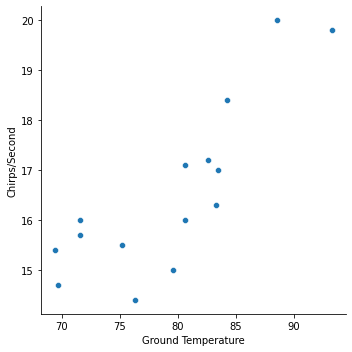

In [ ]:
sns.relplot(x="Ground Temperature",y="Chirps/Second",data=df)

,Chirps/Second,Ground Temperature
Chirps/Second,1.000000,0.832042
Ground Temperature,0.832042,1.000000


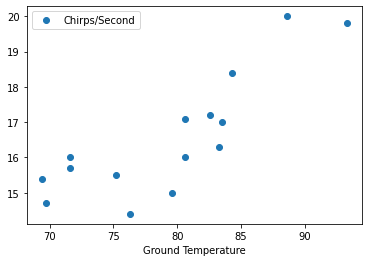

In [ ]:
df.plot(x="Ground Temperature",y="Chirps/Second",style="o")
df.corr()

In [ ]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3)
(x_train.shape,x_test.shape),(y_train.shape,y_test.shape)

(((10, 1), (5, 1)), ((10,), (5,)))

In [ ]:
from sklearn.preprocessing import StandardScaler
scalar=StandardScaler()
scalar.fit(x_train)
scalar.transform(x_train)
scalar.fit(x_test)

StandardScaler()

In [ ]:
from sklearn.linear_model import LinearRegression
Regress=LinearRegression()
Regress.fit(x_train,y_train)
y_pred=Regress.predict(x_test)

In [ ]:
Y_data=Regress.predict(x)
from sklearn import metrics
metrics.r2_score(y,Y_data)

0.6806307057361554

In [ ]:
from sklearn import metrics
metrics.r2_score(y_test,y_pred)

0.7102168856009011

In [ ]:
print(Regress.coef_)
print(Regress.intercept_)

[0.1828766]
1.9406456363176137


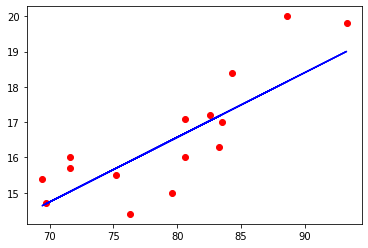

In [ ]:
plt.scatter(x,y,color="r")
plt.plot(x,Regress.predict(x),color="b")

In [ ]:
Regress.predict([[95]])

array([19.31392283])

In [ ]:
temp=(18-(Regress.intercept_))/Regress.coef_
temp

array([87.81524912])

#  Assignment 6

In [ ]:
df=pd.read_fwf("brain_body.txt")
df.head()

,Brain,Body
0,3.385,44.5
1,0.480,15.5
2,1.350,8.1
3,465.000,423.0
4,36.330,119.5


In [ ]:
x=df[["Brain"]].values
y=df["Body"].values

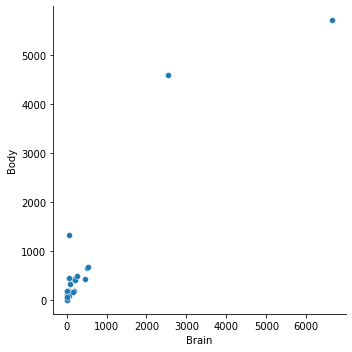

In [ ]:
sns.relplot(x="Brain",y="Body",data=df)

In [ ]:
df.shape

(62, 2)

In [ ]:
df.describe()

,Brain,Body
count,62.000000,62.000000
mean,198.789984,283.134194
std,899.158011,930.278942
min,0.005000,0.140000
25%,0.600000,4.250000
50%,3.342500,17.250000
75%,48.202500,166.000000
max,6654.000000,5712.000000


In [ ]:
max=df.Brain.quantile(0.95)
min=df.Brain.quantile(0.05)
df1=df[(df["Brain"]<max) & (df["Brain"]>min)]
df1.head()

In [ ]:
df1[["Brain","Body"]].corr()

,Brain,Body
Brain,1.000000,0.454462
Body,0.454462,1.000000


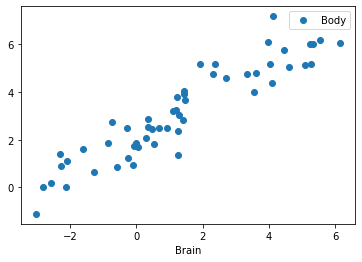

In [ ]:
outlier=np.log(df1)
outlier.plot(x="Brain",y="Body",style="o")

In [ ]:
x=outlier[["Brain"]].values
y=outlier["Body"].values

In [ ]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3)
x_train.shape,x_test.shape

((37, 1), (17, 1))

In [ ]:
from sklearn.linear_model import LinearRegression
Regress=LinearRegression()
Regress.fit(x_train,y_train)
y_pred=Regress.predict(x_test)

In [ ]:
from sklearn import metrics
metrics.r2_score(y_pred,y_test)

0.7581926926231135

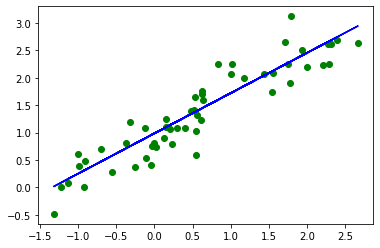

In [ ]:
plt.scatter(x,y,color="g")
plt.plot(x,Regress.predict(x),color="b")

# ***Assignment 7***

In [ ]:
df=pd.read_fwf("salary.txt",names=["Sex", "Rank", "Year", "Degree", "YSdeg", "Salary"])
df.head()

,Sex,Rank,Year,Degree,YSdeg,Salary
0,0,3,25,1,35,36350
1,0,3,13,1,22,35350
2,0,3,10,1,23,28200
3,1,3,7,1,27,26775
4,0,3,19,0,30,33696


In [ ]:
df.describe()

,Sex,Rank,Year,Degree,YSdeg,Salary
count,52.000000,52.000000,52.000000,52.000000,52.000000,52.000000
mean,0.269231,2.038462,7.480769,0.653846,16.115385,23797.653846
std,0.447888,0.862316,5.507536,0.480384,10.222340,5917.289154
min,0.000000,1.000000,0.000000,0.000000,1.000000,15000.000000
25%,0.000000,1.000000,3.000000,0.000000,6.750000,18246.750000
50%,0.000000,2.000000,7.000000,1.000000,15.500000,23719.000000
75%,1.000000,3.000000,11.000000,1.000000,23.250000,27258.500000
max,1.000000,3.000000,25.000000,1.000000,35.000000,38045.000000


In [ ]:
features=df[["Sex", "Rank", "Year", "Degree", "YSdeg"]].values
y=df["Salary"].values

In [ ]:
df[["Sex", "Rank", "Year", "Degree", "YSdeg", "Salary"]].corr()

,Sex,Rank,Year,Degree,YSdeg,Salary
Sex,1.000000,-0.230411,-0.379404,0.077112,-0.088288,-0.252782
Rank,-0.230411,1.000000,0.507980,-0.014564,0.695724,0.867488
Year,-0.379404,0.507980,1.000000,-0.143377,0.638776,0.700669
Degree,0.077112,-0.014564,-0.143377,1.000000,-0.482836,-0.069726
YSdeg,-0.088288,0.695724,0.638776,-0.482836,1.000000,0.674854
Salary,-0.252782,0.867488,0.700669,-0.069726,0.674854,1.000000


In [ ]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
scaler.fit(features)
x=scaler.transform(features)

In [ ]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3)

In [ ]:
from sklearn.linear_model import LinearRegression
Regress=LinearRegression()
Regress.fit(x_train,y_train)
y_pred=Regress.predict(x_test)

In [ ]:
from sklearn import metrics
metrics.r2_score(y_pred,y_test)

0.867696044455321

## Rank, Year, Sex,YSdeg and Degree  are the order of highest absolute values of features

In [ ]:
df1=pd.DataFrame(Regress.coef_,index=["Sex", "Rank", "Year", "Degree", "YSdeg"],columns=['Coeffienct_values'])
df1

,Coeffienct_values
Sex,438.253775
Rank,4403.734626
Year,2164.299536
Degree,-596.942610
YSdeg,-458.788298
